## 1. 사이킷런 소개와 특징

`사이킷런(Scikit-learn)`은 가장 많이 사용되는 파이썬 머신 러닝 라이브러리입니다. 이 책은 사이킷런을 기반으로 하여  다양한 머신 러닝 모델을 작성하는 것을 가르치고 있습니다. 

In [1]:
import sklearn
print(sklearn.__version__)

1.0.1


## 2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

사이킷런을 통해 첫 번째로 만들어볼 머신러닝 모델은 붓꽃 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 피처를 기반으로 꽃의 품종을 예측하는 분류 모델 입니다.

우선 필요한 모듈들을 임포트합니다. `sklearn.datasets` 내의 모듈은 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임이며, `sklearn.tree` 내의 모듈은 트리 기반 ML 알고리즘을 구현한 클래스 모임, `sklearn.model_selection`은 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 모듈의 모임입니다. 붓꽃 데이터 세트를 생성하고 학습 데이터와 테스트 데이터로 분리하고 의사 결정트리를 사용하기 위해 다음과 같이 필요한 모듈을 임포트합니다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

`load_iris()` 함수를 통해 붓꽃 데이터 세트를 로딩한 후 `DataFrame` 으로 변환하여 데이터를 분석합니다.

In [3]:
#데이터 분석을 위해 pandas 사용
import pandas as pd

#붓꽃 데이터셋 로딩
iris=load_iris()

#피쳐 데이터와 레이블 데이터를 서로 분리
iris_data=iris.data
iris_label=iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 DataFrame 으로 변환하여 분석
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0



피처에는 `sepal length`, `sepal width`, `petal length`, `petal width`의 4 종류가 있으며, 레이블 데이터는 `setosa`, `versicolor`, `virginica` 의 세 가지로 각각 0, 1, 2 의 값으로 저장이 되어 있습니다.

다음으로 할 일은 붓꽃 데이터 세트를 학습용 데이터와 테스트용 데이터로 분리하는 일입니다. 테스트용 데이터를 통해 학습 데이터를 이용해 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하기 위해서입니다.
이를 위해 `train_test_split()` 함수를 이용하며, 파라미터로 피처 데이터 세트와 레이블 데이터 세트, 테스트 데이터 세트의 비율, 난수 발생 값을 사용합니다.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

확보한 데이터를 바탕으로 머신러닝 분류 알고리즘 주 하나인 의사 결정 트리를 이용해 학습과 예측을 수행해 보겠습니다. 사이킷런에서 머신러닝 알고리즘을 사용할 때에는 알고리즘에 따라 객체를 생성한 뒤, 객체의 `fit` 매서드에 학습용 피처 데이터 세트와 레이블 데이터 세트를 입력하여 호출하여 학습을 진행시킵니다.

In [5]:
#DecisionTreeClassifier 객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

학습된 모델을 기반으로 예측을 수행하기 위해서는 `predict` 메서드에 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 피처 데이터 세트에 대한 레이블 예측값을 반환합니다.

In [20]:
pred=dt_clf.predict(X_test)

예축 결과를 기반으로 의사 결정 트리의 예측 성능을 평가해 봅시다. `sklearn.datasets` 내의 모듈은 모델의 성능을 측정하는 모듈들의 모임입니다. 이중 `accuracy_score()` 를 이용하여 정확도를 측정해 보겠습니다.

In [21]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


실제 테스트 레이블 데이터 세트와 예측값을 비교한 결과 정확도 0.9333을 확인 할 수 있습니다.

수행한 분류 예측 프로세스를 정리하면 다음과 같습니다.

> 1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
> 2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킵니다.
> 3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류를 예측합니다.
> 4. 평가: 이렇게 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 ML 모델 성능을 평가합니다.

## 3.사이킷런의 기반 프레임워크 익히기

### 3.1. Estiamtor 이해 및 fit(), predict() 메서드

사이킷런은 지도학습의 주요 두 축인 분류와 회귀의 다양한 알고리즘을 클래스로 구현하여 사용하기 쉽게 합니다. 분류 알고리즘을 구현한 클래스는 `Classifier`, 회귀 알고리즘을 구현한 클래스는 `Regressor`로 지칭하며, 이들을 합쳐 `Estimator` 클래스라고 부릅니다. 이들은 `fit()` 과 `predict()` 매서드를 통해 간단하게 학습과 예측을 합니다. `cross_val_score` 와 같은 평가 함수나, `GridSearchCV`와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스는 이 `Estimator` 클래스를 인자로 받아 주어진 역할을 수행합니다.

사이킷런은 비지도학습인 차원 축소, 클러스터링, 피처 추출 등도 클래스로 구현하여 사용하기 쉽게 합니다. 이러한 클래스는 입력 데이터의 형테에 맞춰 데이터를 변환하기 위한 사전 구조 작업인 `fit()` 과, 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 작업을 수행하는 `transform()` 매서드를 사용해 비지도학습을 쉽게 수행할 수 있도록 합니다.

### 3.2. 사이킷런의 주요 모듈

| 분류                              | 모듈명                       | 설명                                                                      |
| --------------------------------- | ---------------------------- | ------------------------------------------------------------------------- |
| 예제 데이터                       | `sklearn.datasets`           | 예제 데이터세트                                                           |
| 피처 처리                         | `sklearn.preprocessing`      | 데이터 전처리에 필요한 가공 기능                                          |
| 피처 처리                         | `sklearn.feature_selection`  | 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 선택                      |
| 피처 처리                         | `sklearn.feature_extraction` | 텍스트 데이터나 이미지 데이터의 벡터화된 피처 추출                        |
| 피처 처리 & 차원 축소             | `sklearn.decomposition`      | 차원 축소와 관련된 알고리즘                                               |
| 데이터 분리, 검증 & 파라미터 튜닝 | `sklearn.model_selection`    | 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출   |
| 평가                              | `sklearn.metrics`            | 다양한 성능 측정 방법 제공                                                |
| ML 알고리즘                       | `sklearn.ensemble`           | 앙상블 알고리즘                                                           |
| ML 알고리즘                       | `sklearn.linear_model`       | 선형 회귀, 릿지, 라쏘, 로지스틱 회귀 등 회귀 관련 알고리즘 제공           |
| ML 알고리즘                       | `sklearn.naive_bayes`        | 나이브 베이즈 알고리즘                                                    |
| ML 알고리즘                       | `sklearn.neighbors`          | 최근접 이웃 알고리즘 알고리즘                                             |
| ML 알고리즘                       | `sklearn.svm`                | 서포트 벡터 머신 알고리즘                                                 |
| ML 알고리즘                       | `sklearn.tree`               | 의사 결정 트리 알고리즘                                                   |
| ML 알고리즘                       | `sklearn.cluster`            | 비지도 클러스터링 알고리즘                                                |
| 유틸리티                          | `sklearn.pipeline`           | 피처 처리 등 변환과 ML 알고리즘 학습, 예측을 묶어 실행할 수 있는 유틸리티 |

### 3.3. 사이킷런의 주요 모듈

(생략)

## 4. Model Selection 모듈 소개

학습과 예측을 동일한 데이터 세트로 수행하게 되면, 이미 학습한 데이터 세트를 기반으로 예측하기 때문에 정확도가 100%가 나오는 문제가 발생합니다. 이러한 문제를 해결하기 위해 사이킷런의 `train_test_split()` 을 통해 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리할 수 있습니다. 파라미터로 피처 데이터 세트와 레이블 데이터 세트를 입력받습니다. 선택적으로, 테스트 데이터 세트의 비율, 데이터를 섞을지, 난수 발생 값을 사용합니다. 다음 예제를 살펴봅시다.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)

dt_clf.fit(X_train, y_train)
pred= dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


전체 데이터 세트의 30%를 테스트 데이터로, 70%를 학습 데이터로 분리한 뒤 학습시킨 모델의 예측 정확도를 확인할 수 있습니다.

### 4.2. 교차 검증

모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 과적합 현상을 막기 위해, 여러 개의 학습 데이터 세트와 테스트 데이터 세트에 대해 학습과 평가를 수행하는 교차 검증이 효율적일 수 있습니다.

#### 4.3.1. K 폴드 교차 검증

K폴드 교차 검증은 전체 데이터 세트를 K개의 데이터 폴드 세트로 만든 다음, 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법입니다.

예를 들어, k=5 일때는 데이터 세트를 5개로 나눈 뒤 그 중 1개를 검증, 나머지 4개를 학습에 사용하는 것을 5회 반복한 후 각 결과를 평균 내어 평가 결과로 반영하면 됩니다. 

사이킷런의 KFold 클래스를 이용해 교차 검증을 쉽게 할 수 있습니다. 다음 예시를 살펴봅시다.

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np


iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

#5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter=0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 변환
for train_index, test_index in kfold.split(features):
    
    #kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    n_iter += 1
    
    #정확도 측정
    accuracy=np.round(accuracy_score(y_test, pred),4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)

#평균 정확도 계산    
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30

## 평균 검증 정확도: 0.9


전체 데이터 세트 150 개를 5등분 하였으므로 120개의 학습 데이터와 30개의 검증 데이터로 학습과 검증이 진행되는 것을 확인할 수 있습니다. 학습 데이터와 검증 데이터가 변하기 때문에 매번 검증 정확도가 달라지며, 교차 검증 정확도의 평균으로 전체 정확도를 측정할 수 있습니다.

#### 4.3.2. Stratified K 폴드

Stratified K 폴드는 특정 레이블 값이 특이하게 많거나 매우 적어 값의 분포가 한쪽으로 치우치는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식입니다. Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배합니다.

우선 붓꽃 데이터 세트에서 레이블 값의 분포도를 확인합시다.

In [10]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

확인 결과 레이블 값은 0, 1, 2 모두 50개로 동일합니다. `StratifiedKFold` 를 수행하고 각 교차 검증에서 학습과 검증 레이블데이터의 분포를 살펴보겠습니다. 이때 주의하여야 할 점은 `StratifiedKFold` 를 사용할 때는 `split()` 매서드의 인자로 피처 데이터 세트 뿐만 아니라 레이블 데이터 세트도 반드시 필요하다는 사실입니다.

In [17]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


`StratifiedKFold` 를 사용하면 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당되었음을 확인할 수 있습니다. 이를 활용하여 붓꽃 데이터를 교차 검증하면 다음과 같습니다.

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

iris=load_iris()
features=iris.data
label=iris.target
dt_clf=DecisionTreeClassifier(random_state=156)

skf = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_index, test_index in skf.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy=np.round(accuracy_score(y_test, pred), 4)
    train_size=X_train.shape[0]
    test_size=X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
    cv_accuracy.append(accuracy)

print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


3 개의 `Stratified K 폴드`로 교차 검증한 결과 평균 검증 정확도가 96.7% 정도임을 확인할 수 있습니다. 왜곡된 레이블 데이터 세트에서는 반드시 `Stratified K 폴드`를 이용해 교차 검증해야 합니다.

#### 4.3.3. 교차 검증을 보다 간편하게- cross_val_score()

사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있는 `cross_val_score()` API 를 제공합니다. 다음과 같은 형태로 선언합니다.

In [ ]:
cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

이중 주요 파라미터는 `estimator`, `X`, `y`, `scoring`, `cv` 입니다. `estimator`는 사이킷런의 분류 또는 회귀 알고리즘 클래스를 의미하며,  `X`는 피처 데이터 세트, `y`는 레이블 데이터 세트, `scoring`은 예측 성능 평가 지표, `cv`는 교차 검증 폴드 수를 의미합니다. `cross_val_score()`는 실행되면 `Stratified K 폴드` 방식으로 진행한 교차 검증의 `scoring` 파라미터 성능 지표 값을 배열로 반환합니다.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data=load_iris()
dt_clf=DecisionTreeClassifier(random_state=156)

data=iris_data.data
label=iris_data.target

scores=cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


주어진 파라미터에 따라 3개의 교차 검증 세트로 측정한 정확도를 확인할 수 있습니다. 비슷한 API로, 여러 평가 지표에 대한 성능을 확인하고 싶을 때에는 `cross_validate()` 를 사용하면 됩니다.

#### 4.3.4. GridSearchCV - 교차 검증과 하이퍼 파라미터 튜닝을 한 번에

하이퍼 파라미터는 머신 러닝 알고리즘을 구성하는 주요 요소로, 이 값을 조정하여 예측 성능을 개선시킬 수 있습니다. 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 해당 파라미터의 집합을 딕셔너리의 형태로 설정하고 `GridSearchCV` 를 사용한다면 최적의 파라미터와 수행 결과를 찾을 수 있습니다. `GridSearchCV`의 주요 파라미터는 `estimator`, 튜닝할 파라미터의 딕셔너리인 `param_grid`, `scoring`, 교차 검증 세트의 개수인 `cv`, 최적 학습 파라미터로 `estimator` 객체를 재학습시킬지의 유무를 결정하는 `refit` 이 있습니다. 다음 예시를 살펴봅시다.

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd

#데이터를 로딩하고 학습과 테스트 데이터 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

#튜닝할 파라미터를 딕셔너리의 형태로 결정
parameters={'max_depth':[1,2,3], 'min_samples_split':[2,3]}

grid_dtree=GridSearchCV(dtree,param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score','split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [21]:
print('GridSearchCV 최적 파라미터:',grid_dtree.best_params_)
print('GridSearchCv 최적 정확도:{0:.4f}'.format(grid_dtree.best_score_))

estimator=grid_dtree.best_estimator_

pred=estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCv 최적 정확도:0.9750
테스트 데이터 세트 정확도: 0.9667


## 5. 데이터 전처리

데이터 전처리 과정은 ML 알고리즘만큼 중요합니다. 사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야할 사항이 있습니다. 우선 결손값 NaN과 Null 은 허용되지 않기 때문에 적당한 값으로 대체되거나 피처가 제거되어야 하며, 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력 값으로 허용하지 않기 때문에 인코딩돼서 숫자 형으로 변환되어야 합니다.

### 5.1. 데이터 인코딩

#### 5.1.1. 레이블 인코딩
레이블 인코딩은 카테고리 피처를 코드형 숫자 값으로 변환하는 것입니다. 예를 들어 상품 구분 'TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서' 가 있다면, TV:1, 냉장고:2, 전자레인지:3, 컴퓨터:4, 선풍기:5, 믹서:6 과 같은숫자 값으로 변환하는 것입니다. 이는 사이킷런의 `LabelEncoder` 클래스를 이용해 쉽게 구현이 가능합니다.

In [3]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder=LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)
print('인코딩 클래스:',encoder.classes_)
print('디코딩 원본값:',encoder.inverse_transform(labels))

인코딩 변환값: [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값: ['TV' '냉장고' '전자레인지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


`fit()` 매서드를 호출해 레이블 인코딩을 수행할 수 있습니다. `classes_` 속성에 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가지고 있으며, `inverse_transform()`을 통해 인코딩된 값을 다시 디코딩할 수 있습니다.

레이블 인코딩은 문자열 값이 숫자형 카테고리 값으로 변환되면서 숫자 값의 크고 작음에 대한 특성이 작용하기 때문에 특정 ML 알고리즘에서 예측 성능이 떨어지는 문제가 발생할 수 있습니다. 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적영되지 않아야 합니다. 트리 계열의 ML 알고리즘은 숫자의 크고 작음 특성을 반영하지 않으므로 레이블 인코딩이 사용되어도 됩니다.

#### 5.1.2. 원-핫 인코딩 (One-Hot Encoding)

원-핫 인코딩은 피처 값의 유형에 따라 새로운 피처를 추가하고 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 말럼은 0을 표시하는 방식입니다. 예를 들어, 위의 예시에서 'TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '믹서' 라는 칼럼을 모두 만들어준 후, TV 인 경우에는 TV 칼럼에 1을, 나머지 칼럼에는 0을 표시하는 방식입니다. 이는 사이킷런의 `OneHotEncoder` 클래스를 이용해 쉽게 구현이 가능합니다.

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

#먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder=LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
#2차원 데이터로 변환
labels = labels.reshape(-1,1)

#원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels=oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())


원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


8개의 레코드를 가진 원본 데이터와 8개의 레코드와 상품의 종류 수인 6개의 칼럼을 가진 데이터로 변환된 것을 확인할 수 있습니다.

판다스에는 원-핫 코딩을 더 쉽게 지원하는 `get_dummies()` 를 사용할 수 있습니다. 이는 `OneHotEncoder()`와는 다르게 문자열 카테고리 값을 바로 변환할 수 있다는 장점을 갖습니다.

In [5]:
import pandas as pd

df=pd.DataFrame({'item' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### 5.2. 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 합니다. 대표적인 방법으로는 표준화(Standardization)와 정규화(Normalization)가 있습니다.

표준화는 데이터의 피처 각각이 평균이 0이고, 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미합니다. 다음과 같은 수식으로 변환이 이루어집니다.
$$ x_i\;new= \frac{ x_i - mean(x)}{ stdev(x) } $$

정규화는 서로 다른 피처의 크기를 통일하기 위해 크기를 최소 0 ~ 최대 1의 값으로 변환하는 것입니다. 다음과 같은 수식으로 변환이 이루어집니다.
$$ x_i\;new= \frac{ x_i - min(x)}{ max(x) - min(x) } $$

벡터 정규화는 선형대수에서의 정규화 개념이 적용되어 개별 벡터를 모든 피처 벡터의 크기로 나눠주는 변환입니다. 세 개의 피처 x, y, z가 있다면 다음과 같은 수식으로 변환이 이루어집니다.
$$ x_i\;new= \frac{ x_i }{ \sqrt{x^2_i + y^2_i + z^2_i} } $$

### 5.3. StandardScaler

`StandardScaler`는 표준화를 쉽게 지원하기 위한 클래스입니다. 데이터 세트를 통해 `StandardScaler`가 어떻게 데이터 값을 변환하는지 확인해 보겠습니다.

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris=load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

#기존 데이터
print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

#데이터 표준화
scaler=StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

#표준화된 데이터
#기존 데이터
print('\nfeature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼의 평균이 0에, 분산은 1에 가깝게 변환된 것을 확인할 수 있습니다.

### 5.4. MinMaxScaler

`MinMaxScaler`는 정규화를 쉽게 지원하기 위한 클래스입니다. 데이터 세트를 통해 `MinMaxScaler`가 어떻게 데이터 값을 변환하는지 확인해 보겠습니다.


In [5]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

iris=load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

#기존 데이터
print('feature들의 최소값')
print(iris_df.min())
print('\nfeature들의 최대값')
print(iris_df.max())

#데이터 표준화
scaler=MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

#표준화된 데이터
#기존 데이터
print('\nfeature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최소값
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
dtype: float64

feature들의 최대값
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
dtype: float64

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용되었음을 알 수 있습니다.

### 5.5. 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

`Scaler`객체를 이용해 학습 데이터 세트로 `fit()` 과 `transform()`을 적용하면 테스트 데이터 세트로는 다시 `fit()`을 수행하지 않고 학습 데이터 세트로 `fit()`을 수행한 결과를 이용해 `transform()`변환을 적용해야 합니다. 테스트 데이터로 다시 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라져 올바른 예측 결과를 도출하지 못할 수 있습니다.

가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리하여야 하며, 그것이 여의치 않다면 학습 데이터로 이미 `fit()`된 `Scaler`객체를 이용해 테스트 데이터에 `transform()`을 적용해 주어야 합니다.

## 6. 사이킷런으로 수행하는 타이타닉 생존자 예측

Kaggle의 타이타닉 탑승자 데이터를 이용하여 사이컷런을 활용해 생존자 예측을 수행해 보겠습니다.
[데이터셋 출처](https://www.kaggle.com/c/titanic/data)

우선 데이터를 불러와 구조를 살펴보겠습니다.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


로딩된 데이터 칼럼 타입을 살펴보겠습니다.

In [55]:
print("\n ### 학습 데이터 정보 ### \n")
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


데이터셋은 891개의 로우, 12개의 칼럼으로 구성되어 있고, 각 칼럼의 데이터 타입도 확인할 수 있습니다.

`Age`, `Cabin`, `Embarked` 칼럼의 Non-Null Count가 칼럼의 수와 다른 것으로 보아 이 세 칼럼은 결측치가 존재합니다.
`Age` 칼럼은 평균값으로, `Cabin`과 `Embarked` 칼럼은 `N` 으로 결측치를 대체하겠습니다.

In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)

다음으로 남아있는 문자열 피처 `Sex`, `Cabin`, `Embarked`의 값 분류를 살펴보겠습니다.

In [10]:
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


`Cabin`칼럼의 값들이 제대로 정리되지 않았다는 사실을 확인할 수 있습니다. 이를 정리하기 위해 `Cabin`속성의 앞 문자만 추출하겠습니다.

In [11]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]

머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터 탐색을 진행해 보겠습니다. 성별, 객실 등급, 나이에 따른 생존 확률을 `seaborn`을 활용해 시각화하여 살펴보겠습니다.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

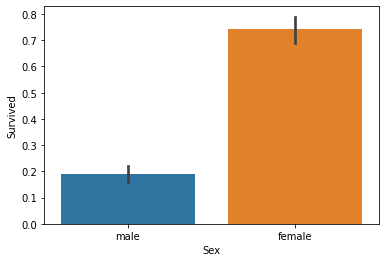

In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Sex',y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

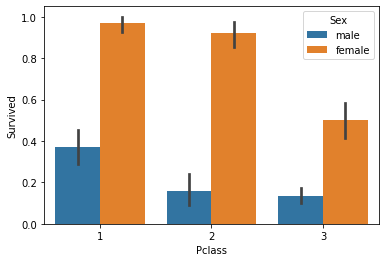

In [14]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

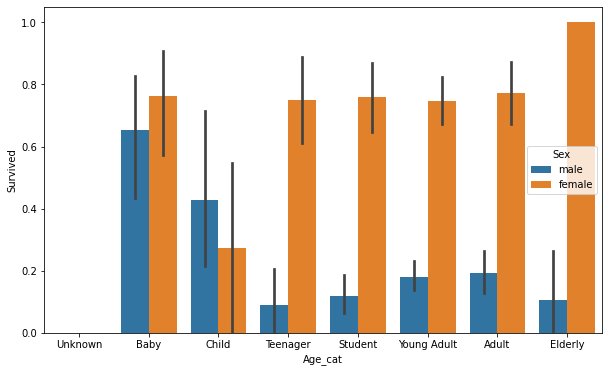

In [17]:
def get_category(age):
    cat=''
    if(age<=-1):
        cat='Unknown'
    elif (age<=5):
        cat='Baby'
    elif (age<=12):
        cat='Child'
    elif (age<=18):
        cat='Teenager'
    elif (age<=25):
        cat='Student'
    elif (age<=35):
        cat='Young Adult'
    elif (age<=60):
        cat= 'Adult'
    else:
        cat='Elderly'
    
    return cat;

plt.figure(figsize=(10,6))

group_names=['Unknown','Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat']= titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

여성이 남성에 비해 생존 확률이 높았으며, 더 높은 객실 등급의 생존 확률이 높으며, 아이와 노약자의 생존 확률이 높다는 것을 확인할 수 있습니다. 즉, `Age`, `Sex`, `PClass` 피처는 생존을 좌우하는 중요한 피처임을 알 수 있습니다.

마지막으로 남아있는 문자열 카테고리 피쳐를 레이블 인코딩을 통해 숫자형으로 변환하겠습니다.

In [18]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)

지금까지의 피처 가공을 정리하고 함수로 만들어 쉽게 재사용할 수 있도록 만들어 보겠습니다.

In [19]:
#결측치 제거
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#불필요한 피쳐 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

#위 함수들을 하나의 함수로 처리
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

데이터를 불러와 피처 데이터 세트와 레이블 데이터 세트를 추출한 후, 피처를 가공하고 테스트 데이터와 학습 데이터를 추출하겠습니다.

In [20]:
#원본 데이터 불러오기
titanic_df=pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

#피처 데이터 가공
X_titanic_df=transform_features(X_titanic_df)

#학습 데이터세트와 테스트 데이터세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

ML 알고리즘인 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 각각 적용하여 타이타닉 생존자 예측을 진행해 보겠습니다.

In [22]:
from  sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# 결정 트리 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# 랜덤 포레스트 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# 로지스틱 회귀 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('로지스틱 회귀 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

결정트리 정확도: 0.7877
랜덤포레스트 정확도: 0.8547
로지스틱 회귀 정확도: 0.8492


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


다음으로 교차 검증을 통해 정확도를 더 자세히 평가해 보겠습니다.

In [24]:
from sklearn.model_selection import cross_val_score

#결정트리 교차검증
print("--결정트리--")
scores_dt = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores_dt):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores_dt)))

#랜덤 포레스트 교차검증
print("\n--랜덤 포레스트--")
scores_rf = cross_val_score(rf_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores_rf):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores_rf)))

#로지스틱 회귀 교차검증
print("\n--로지스틱 회귀--")
scores_lr = cross_val_score(lr_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores_lr):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores_lr)))

--결정트리--
교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879

--랜덤 포레스트--
교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7978
교차 검증 2 정확도: 0.8483
교차 검증 3 정확도: 0.7640
교차 검증 4 정확도: 0.8652
평균 정확도: 0.8137

--로지스틱 회귀--
교차 검증 0 정확도: 0.7989
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.7809
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8090
평균 정확도: 0.7867


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

마지막으로 `GridSearchCV`를 이용해 `DecisionTreeClassifier`의 최적 하이퍼 파라미터를 찾고 성능을 측정해 보겠습니다.

In [26]:
from sklearn.model_selection import GridSearchCV

#탐색할 파라미터
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

#최적 파라미터 탐색
grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#최적 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


하이퍼 파라미터 튜닝을 적용한 결과 정확도가 예측 정확도가 크게 증가한 것을 확인할 수 있습니다.